# Best suited for Globular Clustering Dataset

## Here we consider only Input in Amazon Mobile DataSet

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
import string
from nltk.stem.snowball import SnowballStemmer

In [2]:
# Reading the data file into a DATAFRAME and checking the shape 
data=pd.read_csv('35.1AmazonMobileDataUncleaned.csv')
print(data.shape)

(71922, 2)


In [3]:
def datapreprocess(sen):
    
    sen = re.sub(r"didn't", "did not", sen)
    sen = re.sub(r"don't", "do not", sen)
    sen = re.sub(r"won't", "will not", sen)
    sen = re.sub(r"can't", "can not", sen)
    sen = re.sub(r"wasn't", "do not", sen)
    sen = re.sub(r"\'ve", " have", sen)
    sen = re.sub(r"\'m", " am", sen)
    sen = re.sub(r"\'ll", " will", sen)
    sen = re.sub(r"\'re", " are", sen)
    sen = re.sub(r"\'s", " is", sen)
    sen = re.sub(r"\'d", " would", sen)
    sen = re.sub(r"\'t", " not", sen)
    sen = re.sub(r"\'m", " am", sen)
    sen = re.sub(r"n\'t", " not", sen)
    
    p = set(string.punctuation) # p take all the punctuations, punctuations displayed below
    sen=sen.lower() # convert text to lower case
    words=sen.split() # split the text into words
    ctext=[]
    for i in range(10): #adding numbers from 0 - 9 to p 
        p.add(str(i))
    for i in words:
        t=''.join([x for x in i.encode("ascii","ignore").decode("ascii") if x not in p]) # ignoring non ascii charecters and numbers
        ctext.append(t)
    return " ".join([i for i in ctext]) # joining the cleaned words to text
    
    

stop=set(stopwords.words('english'))
print(stop)
stop.remove('no')
stop.remove('not')
stop.remove('nor')

preprocessed_essays = []
for sentance in data['uncleanedreview'].values:
    try:
        ctxt=datapreprocess(str(sentance))
        if len(ctxt)==0: raise()
        ctxt = ' '.join(e for e in ctxt.split() if e not in stop)
        preprocessed_essays.append(ctxt.lower().strip())
    except:
        preprocessed_essays.append("NAN")  
data['cleanedtext'] = preprocessed_essays
data.drop(data[data["cleanedtext"]=="NAN"].index,axis = 0,inplace = True) # deleting rows that have no text 
data=data.reset_index(drop='true') # after deleting rows index should be reset
data['decision']= data['decision'].replace('positive',1)
data['decision']= data['decision'].replace('negative',0)


s = SnowballStemmer("english")
p=[]
for i in data['cleanedtext'].values:
    k=[]
    for word in i.split():
        k.append(s.stem(word))
    l=' '.join(k)
    p.append(l)

data['j']=p

data.to_csv (r'AmazonMobileDataCleaned.csv')

{'his', 'yourself', 'will', 'were', 'are', 'me', 'while', 'being', 'have', 'needn', 'further', 'more', 'until', "needn't", 'who', 'ma', 'no', 'what', 'an', "doesn't", "don't", 'which', 'this', "haven't", "shan't", 'other', 'such', 'herself', 'mightn', 'about', 'own', 'wouldn', 'itself', 'nor', 'very', 'myself', 'he', "hadn't", "didn't", "mightn't", 'only', 'so', "it's", 'am', 'once', 'does', 'to', "couldn't", 'that', 'few', 'with', 'some', 'didn', "wasn't", 'all', 'them', 'doing', 'up', 'ain', 'again', 'each', "you're", 'hasn', 'after', 'why', 'do', 'wasn', 'her', 'then', 'she', 'where', 'aren', 'ours', 'in', 'hadn', 'shan', 'now', 'if', "should've", 'weren', "wouldn't", 'of', 'during', 'down', 'yourselves', 'whom', 'a', 'just', 'but', 'as', 'did', 't', 'shouldn', 'was', 'over', 'themselves', "mustn't", 'you', 'both', 'they', 'we', 'our', 'between', 'ourselves', 'off', "shouldn't", 'couldn', 'don', 'haven', 'into', 'above', 'mustn', 'is', 'for', 'my', 'been', 'yours', 'those', 'same', 

In [4]:
data=pd.read_csv('AmazonMobileDataCleaned.csv',nrows=5000)
print(data.shape)
label = data['decision'].values
feedback = data.drop(['decision'], axis=1)
print(label.shape)
print(feedback.shape)
print("------------------------------")

from sklearn.model_selection import train_test_split
# random_state : DEFAULT = None
# random_state in train_test_split = 3 or AnyInteger : Reproducing the same dataset into Train and Test, everytime you run this cell
inputtrain, inputtest, outputtrain, outputtest = train_test_split(feedback, label, test_size=0.20, stratify=label)
print(inputtrain.shape)
print(inputtest.shape)
print(outputtrain.shape)
print(outputtest.shape)

(5000, 5)
(5000,)
(5000, 4)
------------------------------
(4000, 4)
(1000, 4)
(4000,)
(1000,)


In [5]:
# convert into Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
featur = []
vec = CountVectorizer(min_df=10,ngram_range=(1,4))
vec.fit(inputtrain['j'].values) # fit has to happen only on train data


train_cleanedtext = vec.transform(inputtrain['j'].values)
test_cleanedtext= vec.transform(inputtest['j'].values)

print("After vectorizations")
print(train_cleanedtext.shape)
print(test_cleanedtext.shape)
print(outputtrain.shape)
print(outputtest.shape)
print("...............................")

featur= featur+vec.get_feature_names()

After vectorizations
(4000, 2798)
(1000, 2798)
(4000,)
(1000,)
...............................


### STEPS INVOLVED IN FINDING BEST CLUSTER SIZE(K)

In [2]:


'''
for K=1,
 1. Use K Means ++             --->  initial positioning of Centoids(C1)
 2. K-Means Clustering   --->  Identify Cluster SC1
 3. Calculate SilhoutteMean for K=1
 
for K=2,
 1. Use K Means ++             --->  initial positioning of Centoids(C1,C2)
 2. K-Means Clustering   --->  Identify Clusters SC1,SC2
 3. Calculate SilhoutteMean for K=2
 
for K=3,
 1. Use K Means ++             --->  initial positioning of Centoids(C1,C2,C3)
 2. K-Means Clustering   --->  Identify Clusters SC1,SC2,SC3
 3. Calculate SilhoutteMean for K=3
 
for K=4,5,6..........
 
Choose Value Of K Which Has Maximum SilhoutteMean
'''

'\nfor K=1,\n 1. Use K Means ++             --->  initial positioning of Centoids(C1)\n 2. K-Means Clustering   --->  Identify Cluster SC1\n 3. Calculate SilhoutteMean for K=1\n \nfor K=2,\n 1. Use K Means ++             --->  initial positioning of Centoids(C1,C2)\n 2. K-Means Clustering   --->  Identify Clusters SC1,SC2\n 3. Calculate SilhoutteMean for K=2\n \nfor K=3,\n 1. Use K Means ++             --->  initial positioning of Centoids(C1,C2,C3)\n 2. K-Means Clustering   --->  Identify Clusters SC1,SC2,SC3\n 3. Calculate SilhoutteMean for K=3\n \nfor K=4,5,6..........\n \nChoose Value Of K Which Has Maximum SilhoutteMean\n'

### Elbow Method to find best K

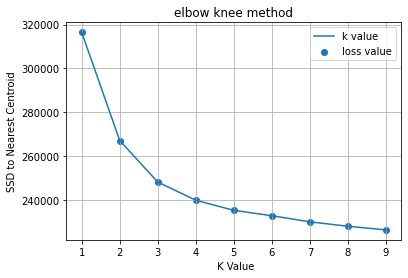

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
k=[]
iner=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i).fit(train_cleanedtext)
    # inertia_ : Sum of squared distances of datapoint to their ClosestClusterCenter.
    iner.append(kmeans.inertia_)
    k.append(i)
plt.plot(k,iner, label='k value')

plt.scatter(k,iner, label='loss value')


plt.legend()
plt.xlabel(" K Value")
plt.ylabel("SSD to Nearest Centroid") # Sum of Squared Distance to the NearestCentroidCenter 
plt.title("elbow knee method")
plt.grid()
plt.show()

###  Silhouette Method to find best K

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


noofclusters = [2, 3,4,5,6,7,8]

for clusters in noofclusters:
    
    clust = KMeans(n_clusters=clusters)
    cluster_labels = clust.fit_predict(train_cleanedtext)

    
    silhouette_avg = silhouette_score(train_cleanedtext, cluster_labels)
    print("noofclusters =", clusters,
          "The average silhouette_score is :", silhouette_avg)


noofclusters = 2 The average silhouette_score is : 0.5908660827818437
noofclusters = 3 The average silhouette_score is : 0.4469095240296482
noofclusters = 4 The average silhouette_score is : 0.3484000223469489
noofclusters = 5 The average silhouette_score is : 0.2853931556140779
noofclusters = 6 The average silhouette_score is : 0.18906231012018848
noofclusters = 7 The average silhouette_score is : 0.1843678382296587
noofclusters = 8 The average silhouette_score is : 0.21921418075122778


### Model trained only on Input Features

In [9]:
# n_clusters
# init(default=’k-means++’) ---> How to Initialize Centroid Position
# max_iter ---> No of Interations K-Means Clustering Algorithm runs
# random_state = 3 or Integer other than 0 ---> 

kmeans = KMeans(n_clusters=2).fit(train_cleanedtext) 
Predicted_trained=kmeans.labels_ # Training Dataset Predicted Cluster Labels
print(Predicted_trained)

[0 0 0 ... 0 0 0]


In [12]:
print(kmeans.predict(test_cleanedtext)) # Testing Dataset Predicted Cluster Labels

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 